In [1]:
import pandas as pd
from auth import authorize
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from numpy.linalg import norm

In [2]:
data = pd.read_csv('spotify_data/data.csv')

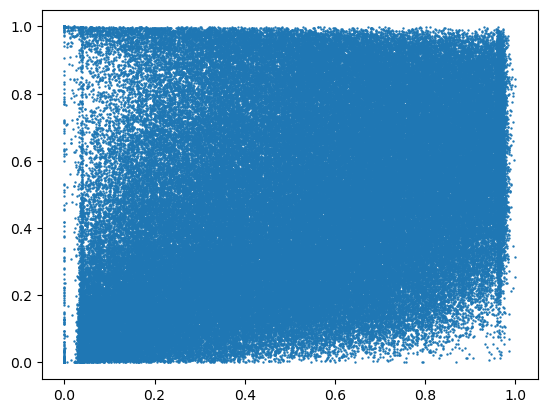

In [3]:
plt.scatter(data['valence'], data['energy'], s=0.5)
plt.show()

In [4]:
data["mood_vec"] = data[["valence", "energy"]].values.tolist()

In [5]:
def recommend(track_id, ref_df, sp, n_recs = 5):
    track_features = sp.track_audio_features(track_id)
    track_moodvec = np.array([track_features.valence, track_features.energy])
    
    # Compute distances to all reference tracks
    ref_df["distances"] = ref_df["mood_vec"].apply(lambda x: norm(track_moodvec-np.array(x)))
    # Sort distances from lowest to highest
    ref_df_sorted = ref_df.sort_values(by = "distances", ascending = True)
    # If the input track is in the reference set, it will have a distance of 0, but should not be recommendet
    ref_df_sorted = ref_df_sorted[ref_df_sorted["id"] != track_id]
    
    # Return n recommendations
    return ref_df_sorted.iloc[:n_recs]

In [9]:
sp = authorize()
recommend('1UGD3lW3tDmgZfAVDh6w7r', data, sp)['id'].values.tolist()

['7o3Mcis1uKcYDuuJD1W0Rm',
 '4h9aHPj4VUQW7FdyzPjovK',
 '06ZyuKNXTq0MdW91RNY1Ig',
 '50LpRhpQZGiOfPrkqiE1OP',
 '5A560HwQAgEC2ta48xKfJ3']